# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D, DepthwiseConv2D, SeparableConv2D
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


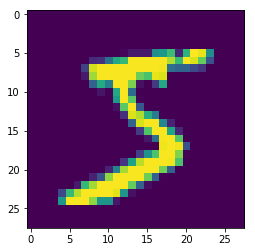

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

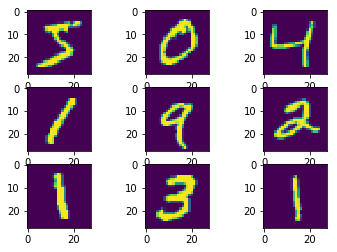

In [0]:
for i in range(0, 9):
	plt.subplot(330 + 1 + i)
	plt.imshow(X_train[i])
plt.show()

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Tried incorporating image augmentation but that did not help. Will be working on it further to investigate and come up with a solution

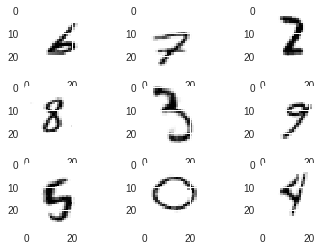

In [0]:
############################## Code for image augmentation using Keras #########################################


### Commented as it did not help. Will work on it further. ###################


#datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
#datagen = ImageDataGenerator(zca_whitening=True)    #no need
#datagen = ImageDataGenerator(rotation_range=30)
#datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1)
#datagen = ImageDataGenerator(horizontal_flip=False, vertical_flip=True) no need
#datagen = ImageDataGenerator(zoom_range=[0.8, 1.5])
#datagen = ImageDataGenerator(fill_mode='nearest')

#datagen = ImageDataGenerator(featurewise_center=True, 
#                             featurewise_std_normalization=True,
#                             rotation_range=30,
#                             width_shift_range=0.1, height_shift_range=0.1,
#                             zoom_range=[0.8, 1.5],
#                             fill_mode='nearest')
# fit parameters from data
#datagen.fit(X_train)
# configure batch size and retrieve one batch of images
#for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
	# create a grid of 3x3 images
#	for i in range(0, 9):
#	plt.subplot(330 + 1 + i)
#	plt.imshow(X_batch[i].reshape(28, 28))
	# show the plot
#plt.show()
#break

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
########################################### Part of code for image augmentation ######################################

### Commented as it did not help. Will work on it further. ###################

#datagen = ImageDataGenerator(featurewise_center=True, 
#                             featurewise_std_normalization=True,
#                             rotation_range=30,
#                             width_shift_range=0.1, height_shift_range=0.1,
#                             zoom_range=[0.8, 1.5],
#                             fill_mode='nearest')


Using separable convolution to reduce the number of parameters.

In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))  # 26, 32
model.add(SeparableConv2D(64, 3, 3, activation='relu'))  # 24, 64       
model.add(SeparableConv2D(64, 3, 3, activation='relu')) # 22, 64
model.add(Convolution2D(32, 1, activation='relu'))  #22, 32
model.add(MaxPooling2D(pool_size=(2, 2)))   # 11, 32


model.add(SeparableConv2D(32, 3, 3, activation='relu'))  # 9, 32
model.add(SeparableConv2D(64, 3, 3, activation='relu'))  # 7, 64
model.add(Convolution2D(10, 1, activation='relu'))  #7, 10
model.add(MaxPooling2D(pool_size=(2, 2)))   # 3, 10

model.add(Convolution2D(10, 3))

model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(64, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(64, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(32, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(64, (3, 3), activation="relu")`
  del sys.path[0]


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 24, 24, 64)        2400      
_________________________________________________________________
separable_conv2d_2 (Separabl (None, 22, 22, 64)        4736      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 32)        2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
separable_conv2d_3 (Separabl (None, 9, 9, 32)          1344      
_________________________________________________________________
separable_conv2d_4 (Separabl (None, 7, 7, 64)          2400      
__________

In [0]:
########################################### Part of code for image augmentation ######################################

### Commented as it did not help. Will work on it further. ###################

#datagen.fit(X_train)

In [0]:
X_train.shape

(60000, 28, 28, 1)

Reduced the default learning rate.

In [0]:
adam = keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)   # With reduced learning rate

model.compile(loss='categorical_crossentropy',
             optimizer=adam,
             metrics=['accuracy'])

In [0]:
########################################### Part of code for image augmentation ######################################

### Commented as it did not help. Will work on it further. ###################

#model.fit_generator(datagen.flow(X_train, Y_train, batch_size=32),
#                    steps_per_epoch=len(X_train)//32, epochs=30, verbose=1)

In [0]:
model.fit(X_train, Y_train, batch_size=1024, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 11s 191us/step - loss: 0.0258 - acc: 0.9919
Epoch 2/10
60000/60000 [==============================] - 11s 190us/step - loss: 0.0275 - acc: 0.9907
Epoch 3/10
60000/60000 [==============================] - 11s 190us/step - loss: 0.0245 - acc: 0.9920
Epoch 4/10
60000/60000 [==============================] - 11s 190us/step - loss: 0.0238 - acc: 0.9924
Epoch 5/10
60000/60000 [==============================] - 11s 191us/step - loss: 0.0240 - acc: 0.9922
Epoch 6/10
60000/60000 [==============================] - 11s 189us/step - loss: 0.0237 - acc: 0.9921
Epoch 7/10
60000/60000 [==============================] - 11s 190us/step - loss: 0.0245 - acc: 0.9917
Epoch 8/10
60000/60000 [==============================] - 11s 189us/step - loss: 0.0226 - acc: 0.9920
Epoch 9/10
60000/60000 [==============================] - 11s 191us/step - loss: 0.0222 - acc: 0.9926
Epoch 10/10
60000/60000 [==============================] - 11s 190us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.027036906338125846, 0.9931]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[1.11881196e-21 1.53152339e-13 2.78910358e-12 4.66631433e-14
  6.54365956e-18 2.92780901e-20 1.06648958e-31 1.00000000e+00
  8.25197059e-20 4.23969956e-11]
 [1.20047750e-09 1.17587910e-11 1.00000000e+00 2.84605188e-15
  7.35796840e-13 1.52014687e-17 6.85874066e-11 4.22658683e-15
  1.27483224e-12 1.05799646e-12]
 [1.82565998e-08 9.99999762e-01 4.08514628e-12 1.02971787e-12
  4.60897311e-08 1.11679242e-10 1.17069376e-07 4.96156041e-08
  3.46700402e-09 2.58536248e-10]
 [1.00000000e+00 6.25599916e-32 1.77994561e-17 3.58635788e-16
  3.02325053e-19 1.52980605e-14 6.42426806e-11 1.25065245e-26
  1.26527215e-14 3.48167294e-11]
 [5.83622813e-19 7.82610608e-12 1.64391382e-13 1.12979555e-08
  9.99999046e-01 1.14405707e-09 1.45916793e-10 4.57293621e-12
  5.04753302e-07 4.68534040e-07]
 [1.36595601e-09 1.00000000e+00 7.19279711e-14 2.59606810e-16
  1.83179942e-08 8.26444382e-13 1.31220468e-09 9.18900156e-09
  1.55911551e-11 3.66943238e-12]
 [2.70885914e-32 1.27081878e-09 5.66300288e-17 5.94820449e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

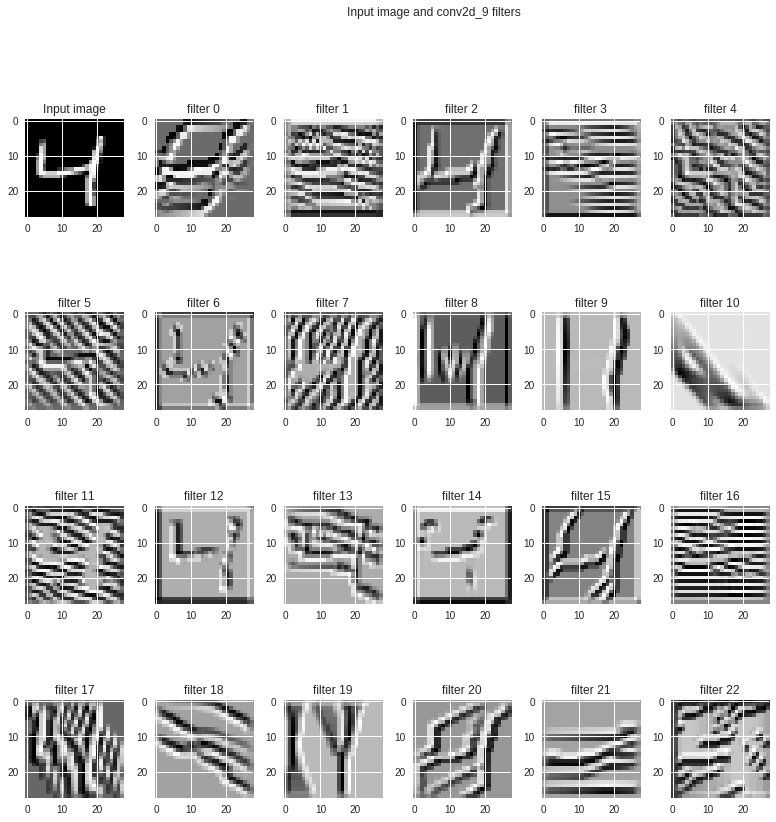

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_9'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()